In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
logs = pd.read_csv('keys.csv')

In [85]:
consumerKey = logs['Keys'][0]
consumerSecret = logs['Keys'][1]
bearedToken = logs['Keys'][2]
accessToken = logs['Keys'][3]
accessTokenSecret = logs['Keys'][4]

In [86]:
client = tweepy.Client( bearer_token=bearedToken, 
                        consumer_key=consumerKey, 
                        consumer_secret=consumerSecret, 
                        access_token=accessToken, 
                        access_token_secret=accessTokenSecret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [87]:
# Define query
query = 'bitcoin'

# get max. 10 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=100)

In [88]:
# Save data as dictionary
tweets_dict = tweets.json() 

# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 

# Transform to pandas Dataframe
data = pd.json_normalize(tweets_data) 

In [89]:
data

,id,created_at,author_id,text
0,1496812703716986880,2022-02-24T11:42:12.000Z,1490394025576304650,You can be a part of this community and enjoy ...
1,1496812703234600963,2022-02-24T11:42:12.000Z,900642718438895616,RT @paddi_hansen: The European Parliament want...
2,1496812703192596483,2022-02-24T11:42:12.000Z,810723727696625666,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...
3,1496812702680944645,2022-02-24T11:42:12.000Z,1464976741814919172,@BluesparrowC @WatcherGuru @BlueSparrowETH #Bl...
4,1496812701439631360,2022-02-24T11:42:12.000Z,1408404142003875855,RT @AirdropStario: 💧 Matrix Airdrop 💧\n\n🏆 Tas...
...,...,...,...,...
95,1496812644422062083,2022-02-24T11:41:58.000Z,1259552132736434179,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...
96,1496812643273023494,2022-02-24T11:41:58.000Z,1487794011301871619,RT @AirdropDet: 🔍 New #Airdrop: Hoglympics\n\n...
97,1496812642769514499,2022-02-24T11:41:58.000Z,1480510726477336578,RT @HawkBlaze_: #Netflix Orders #Crypto Seri...
98,1496812642622652417,2022-02-24T11:41:58.000Z,4409193442,RT @BitcoinFear: Bitcoin Fear and Greed Index ...


In [90]:
df = data.filter(['text'], axis=1)

In [91]:
df

,text
0,You can be a part of this community and enjoy ...
1,RT @paddi_hansen: The European Parliament want...
2,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...
3,@BluesparrowC @WatcherGuru @BlueSparrowETH #Bl...
4,RT @AirdropStario: 💧 Matrix Airdrop 💧\n\n🏆 Tas...
...,...
95,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...
96,RT @AirdropDet: 🔍 New #Airdrop: Hoglympics\n\n...
97,RT @HawkBlaze_: #Netflix Orders #Crypto Seri...
98,RT @BitcoinFear: Bitcoin Fear and Greed Index ...


In [92]:
def cleantwt(twt):
    twt = re.sub('#bitcoin', 'bitcoin', twt)
    twt = re.sub('#Bitcoin', 'bitcoin', twt)
    twt = re.sub('#[A-Za-z0-9]+', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', 'bitcoin', twt)
    return twt

In [93]:
df['clean_tweets'] = df['text'].apply(cleantwt)

In [94]:
df

,text,clean_tweets
0,You can be a part of this community and enjoy ...,You can be a part of this community and enjoy ...
1,RT @paddi_hansen: The European Parliament want...,RT @paddi_hansen: The European Parliament want...
2,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...
3,@BluesparrowC @WatcherGuru @BlueSparrowETH #Bl...,@BluesparrowC @WatcherGuru @BlueSparrowETH is...
4,RT @AirdropStario: 💧 Matrix Airdrop 💧\n\n🏆 Tas...,RT @AirdropStario: 💧 Matrix Airdrop 💧🏆 Task: ...
...,...,...
95,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...
96,RT @AirdropDet: 🔍 New #Airdrop: Hoglympics\n\n...,RT @AirdropDet: 🔍 New : Hoglympics💲 Reward: Up...
97,RT @HawkBlaze_: #Netflix Orders #Crypto Seri...,RT @HawkBlaze_: Orders Series About a Coup...
98,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,RT @BitcoinFear: Bitcoin Fear and Greed Index ...


In [95]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [97]:
df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)


In [98]:
df

,text,clean_tweets,Subjectivity,Polarity
0,You can be a part of this community and enjoy ...,You can be a part of this community and enjoy ...,0.500000,0.500000
1,RT @paddi_hansen: The European Parliament want...,RT @paddi_hansen: The European Parliament want...,0.050000,0.100000
2,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...,0.000000,0.000000
3,@BluesparrowC @WatcherGuru @BlueSparrowETH #Bl...,@BluesparrowC @WatcherGuru @BlueSparrowETH is...,0.100000,0.000000
4,RT @AirdropStario: 💧 Matrix Airdrop 💧\n\n🏆 Tas...,RT @AirdropStario: 💧 Matrix Airdrop 💧🏆 Task: ...,0.000000,0.000000
...,...,...,...,...
95,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...,0.000000,0.000000
96,RT @AirdropDet: 🔍 New #Airdrop: Hoglympics\n\n...,RT @AirdropDet: 🔍 New : Hoglympics💲 Reward: Up...,0.218182,0.245455
97,RT @HawkBlaze_: #Netflix Orders #Crypto Seri...,RT @HawkBlaze_: Orders Series About a Coup...,0.100000,-0.100000
98,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,1.000000,-0.125000


In [99]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

In [100]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [101]:
df

,text,clean_tweets,Subjectivity,Polarity,Sentiment
0,You can be a part of this community and enjoy ...,You can be a part of this community and enjoy ...,0.500000,0.500000,Positive
1,RT @paddi_hansen: The European Parliament want...,RT @paddi_hansen: The European Parliament want...,0.050000,0.100000,Positive
2,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...,0.000000,0.000000,Neutral
3,@BluesparrowC @WatcherGuru @BlueSparrowETH #Bl...,@BluesparrowC @WatcherGuru @BlueSparrowETH is...,0.100000,0.000000,Neutral
4,RT @AirdropStario: 💧 Matrix Airdrop 💧\n\n🏆 Tas...,RT @AirdropStario: 💧 Matrix Airdrop 💧🏆 Task: ...,0.000000,0.000000,Neutral
...,...,...,...,...,...
95,RT @kriptozeryan: #Bitcoin \n\nŞu dakikalarda ...,RT @kriptozeryan: bitcoin Şu dakikalarda Türki...,0.000000,0.000000,Neutral
96,RT @AirdropDet: 🔍 New #Airdrop: Hoglympics\n\n...,RT @AirdropDet: 🔍 New : Hoglympics💲 Reward: Up...,0.218182,0.245455,Positive
97,RT @HawkBlaze_: #Netflix Orders #Crypto Seri...,RT @HawkBlaze_: Orders Series About a Coup...,0.100000,-0.100000,Negative
98,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,1.000000,-0.125000,Negative


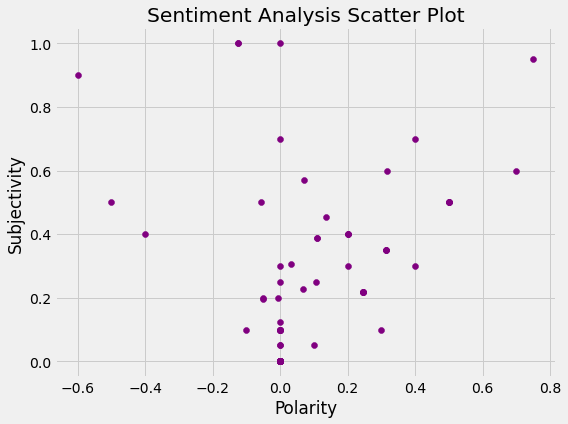

In [102]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()